**IMPORT THE NECESSARY LIBRARIES**

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, BayesianRidge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

## EXPLORATORY DATA ANALYSIS

**LOAD AND PREPARE DATA**

In [71]:
df1 = pd.read_csv("/content/prevalence-by-mental-and-substance-use-disorder.csv")
df2 = pd.read_csv("/content/mental-and-substance-use-as-share-of-disease.csv")

In [72]:
df1.head()

Entity Code  Year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   
2  Afghanistan  AFG  1992   
3  Afghanistan  AFG  1993   
4  Afghanistan  AFG  1994   

   Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.228979                          
1                                           0.228120                          
2                                           0.227328                          
3                                           0.226468                          
4                                           0.225567                          

   Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.721207                             
1                                           0.719952                             
2                                           0.718418                             
3                                           0.717452                             
4                                           0.717012                             

   Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.131001                             
1                                           0.126395                             
2                                           0.121832                             
3                                           0.117942                             
4                                           0.114547                             

   Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           4.835127                              
1                                           4.821765                              
2                                           4.801434                              
3                                           4.789363                              
4                                           4.784923                              

   Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.454202                               
1                                           0.447112                               
2                                           0.441190                               
3                                           0.435581                               
4                                           0.431822                               

   Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           5.125291                                 
1                                           5.116306                                 
2                                           5.106558                                 
3                                           5.100328                                 
4                                           5.099424                                 

   Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)  
0                                           0.444036                                 
1                                           0.444250                                 
2                                           0.445501                                 
3                                           0.445958                                 
4                                           0.445779

In [73]:
df2.head(10)

Entity Code  Year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   
2  Afghanistan  AFG  1992   
3  Afghanistan  AFG  1993   
4  Afghanistan  AFG  1994   
5  Afghanistan  AFG  1995   
6  Afghanistan  AFG  1996   
7  Afghanistan  AFG  1997   
8  Afghanistan  AFG  1998   
9  Afghanistan  AFG  1999   

   DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)  
0                                           1.696670                                                
1                                           1.734281                                                
2                                           1.791189                                                
3                                           1.776779                                                
4                                           1.712986                                                
5                                           1.738272                                                
6                                           1.778098                                                
7                                           1.781815                                                
8                                           1.729402                                                
9                                           1.850988

In [74]:
#merging two datasets
data = pd.merge(df1, df2)
data.head(10)


Entity Code  Year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   
2  Afghanistan  AFG  1992   
3  Afghanistan  AFG  1993   
4  Afghanistan  AFG  1994   
5  Afghanistan  AFG  1995   
6  Afghanistan  AFG  1996   
7  Afghanistan  AFG  1997   
8  Afghanistan  AFG  1998   
9  Afghanistan  AFG  1999   

   Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.228979                          
1                                           0.228120                          
2                                           0.227328                          
3                                           0.226468                          
4                                           0.225567                          
5                                           0.224713                          
6                                           0.223690                          
7                                           0.222424                          
8                                           0.221129                          
9                                           0.220065                          

   Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.721207                             
1                                           0.719952                             
2                                           0.718418                             
3                                           0.717452                             
4                                           0.717012                             
5                                           0.716686                             
6                                           0.716388                             
7                                           0.716143                             
8                                           0.716139                             
9                                           0.716323                             

   Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.131001                             
1                                           0.126395                             
2                                           0.121832                             
3                                           0.117942                             
4                                           0.114547                             
5                                           0.111129                             
6                                           0.107786                             
7                                           0.103931                             
8                                           0.100343                             
9                                           0.097946                             

   Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           4.835127                              
1                                           4.821765                              
2                                           4.801434                              
3                                           4.789363                              
4                                           4.784923                              
5                                           4.780851                              
6                                           4.777272                              
7                                           4.775242                              
8                                           4.777377                              
9                                           4.782067                              

   Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)  \
0             

Data Cleaning

In [75]:
data.isnull().sum()

Entity                                                                                               0
Code                                                                                               690
Year                                                                                                 0
Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)                             0
Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)                          0
Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)                          0
Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)                         0
Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)                        0
Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)                      0
Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (P

In [76]:
#drop the column
data.drop('Code',axis=1,inplace=True)

In [77]:
data.head(10)

Entity  Year  \
0  Afghanistan  1990   
1  Afghanistan  1991   
2  Afghanistan  1992   
3  Afghanistan  1993   
4  Afghanistan  1994   
5  Afghanistan  1995   
6  Afghanistan  1996   
7  Afghanistan  1997   
8  Afghanistan  1998   
9  Afghanistan  1999   

   Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.228979                          
1                                           0.228120                          
2                                           0.227328                          
3                                           0.226468                          
4                                           0.225567                          
5                                           0.224713                          
6                                           0.223690                          
7                                           0.222424                          
8                                           0.221129                          
9                                           0.220065                          

   Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.721207                             
1                                           0.719952                             
2                                           0.718418                             
3                                           0.717452                             
4                                           0.717012                             
5                                           0.716686                             
6                                           0.716388                             
7                                           0.716143                             
8                                           0.716139                             
9                                           0.716323                             

   Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.131001                             
1                                           0.126395                             
2                                           0.121832                             
3                                           0.117942                             
4                                           0.114547                             
5                                           0.111129                             
6                                           0.107786                             
7                                           0.103931                             
8                                           0.100343                             
9                                           0.097946                             

   Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           4.835127                              
1                                           4.821765                              
2                                           4.801434                              
3                                           4.789363                              
4                                           4.784923                              
5                                           4.780851                              
6                                           4.777272                              
7                                           4.775242                              
8                                           4.777377                              
9                                           4.782067                              

   Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.454202                 

In [78]:
data.size,data.shape

(68400, (6840, 10))

In [79]:
data.set_axis(['Country','Year','Schizophrenia', 'Bipolar_disorder', 'Eating_disorder','Anxiety','drug_usage','depression','alcohol','mental_fitness'], axis='columns', inplace=True)

In [80]:
data.head(10)

Country  Year  Schizophrenia  Bipolar_disorder  Eating_disorder  \
0  Afghanistan  1990       0.228979          0.721207         0.131001   
1  Afghanistan  1991       0.228120          0.719952         0.126395   
2  Afghanistan  1992       0.227328          0.718418         0.121832   
3  Afghanistan  1993       0.226468          0.717452         0.117942   
4  Afghanistan  1994       0.225567          0.717012         0.114547   
5  Afghanistan  1995       0.224713          0.716686         0.111129   
6  Afghanistan  1996       0.223690          0.716388         0.107786   
7  Afghanistan  1997       0.222424          0.716143         0.103931   
8  Afghanistan  1998       0.221129          0.716139         0.100343   
9  Afghanistan  1999       0.220065          0.716323         0.097946   

    Anxiety  drug_usage  depression   alcohol  mental_fitness  
0  4.835127    0.454202    5.125291  0.444036        1.696670  
1  4.821765    0.447112    5.116306  0.444250        1.734281  
2  4.801434    0.441190    5.106558  0.445501        1.791189  
3  4.789363    0.435581    5.100328  0.445958        1.776779  
4  4.784923    0.431822    5.099424  0.445779        1.712986  
5  4.780851    0.428578    5.098495  0.445422        1.738272  
6  4.777272    0.426393    5.100580  0.444837        1.778098  
7  4.775242    0.423720    5.105474  0.443938        1.781815  
8  4.777377    0.422491    5.113707  0.442665        1.729402  
9  4.782067    0.421215    5.120480  0.441428        1.850988

Visualization

[]

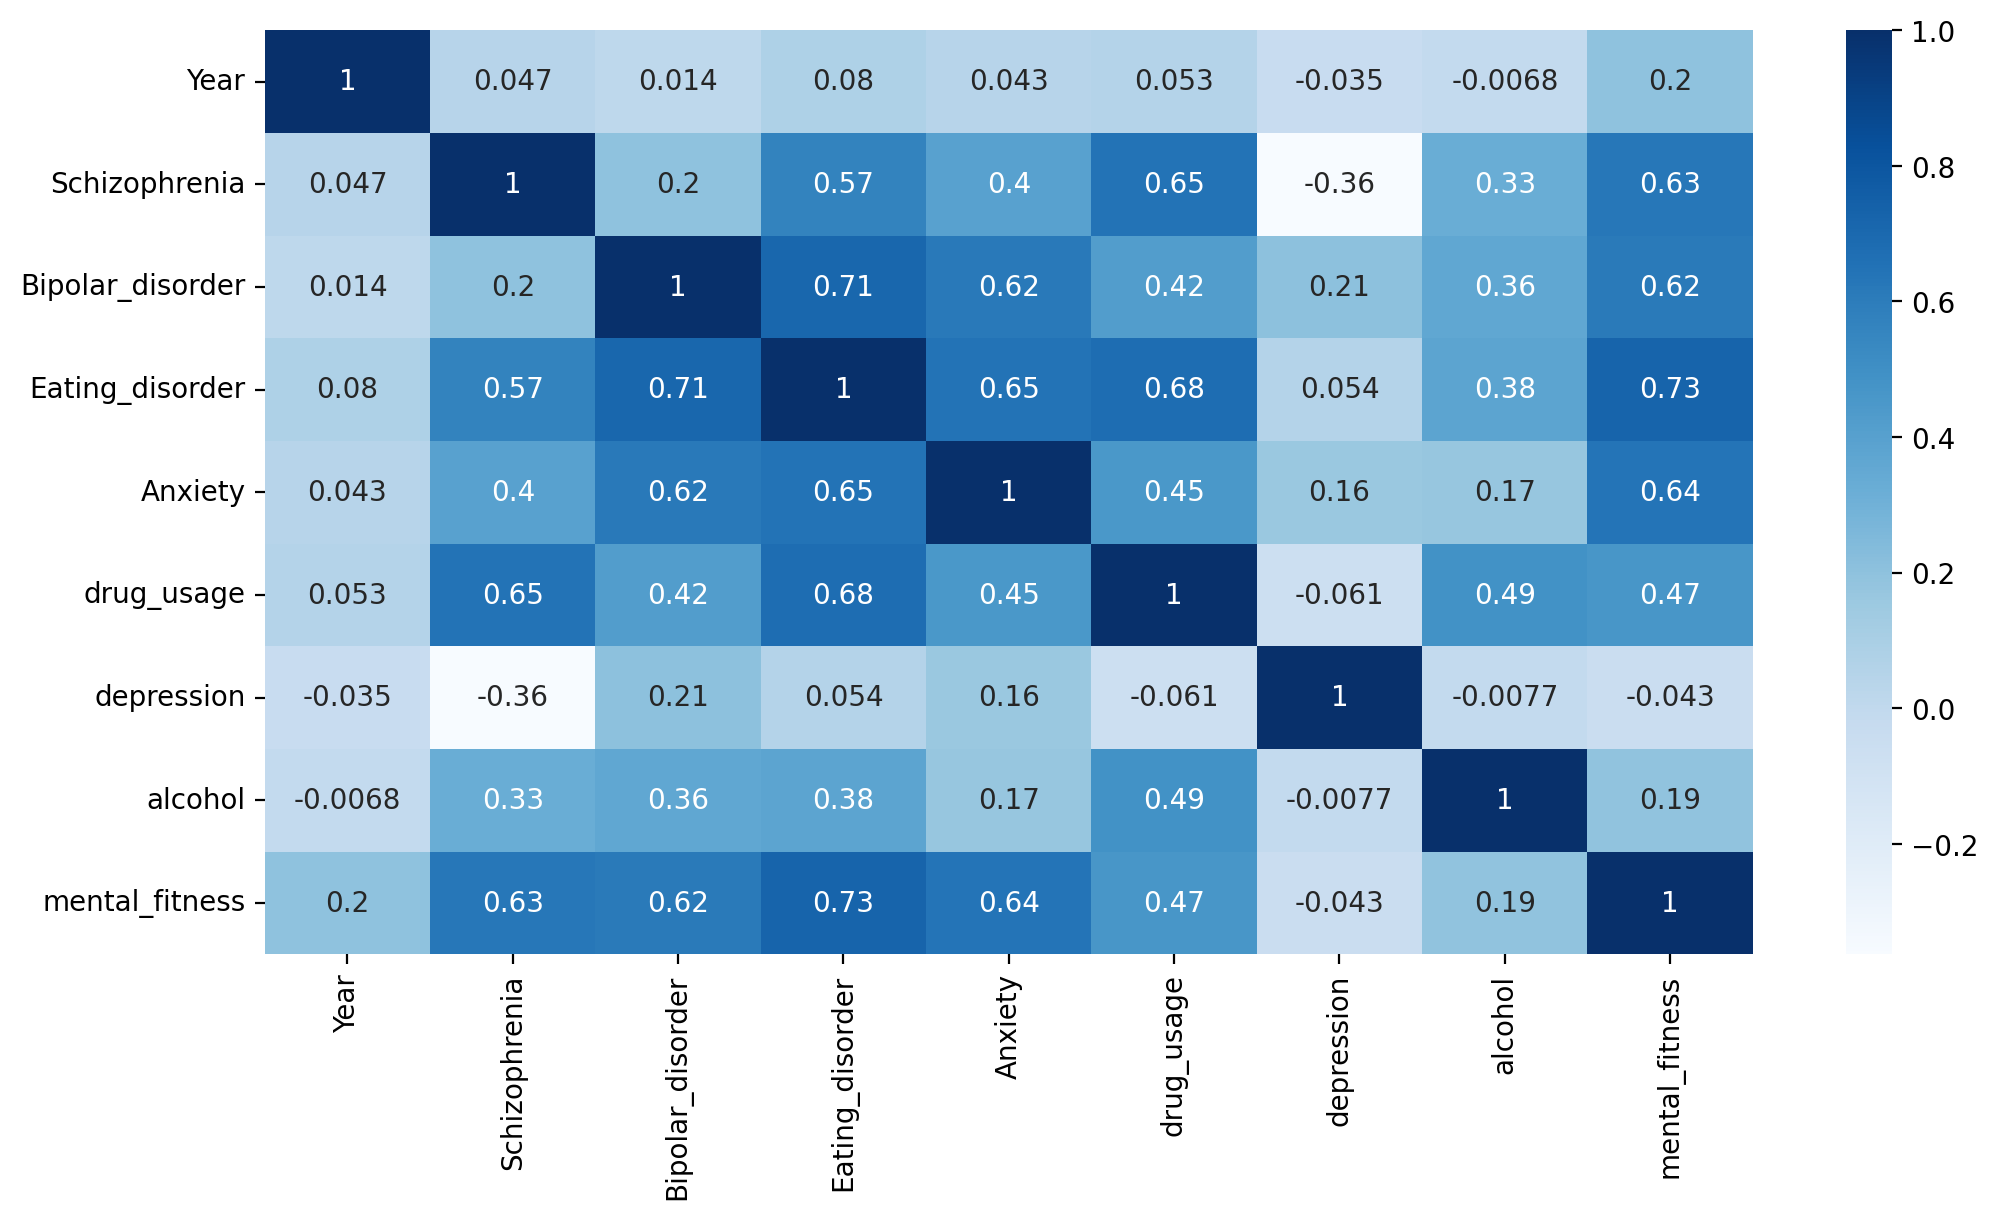

In [81]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True,cmap='Blues')
plt.plot()

Takeaway Points

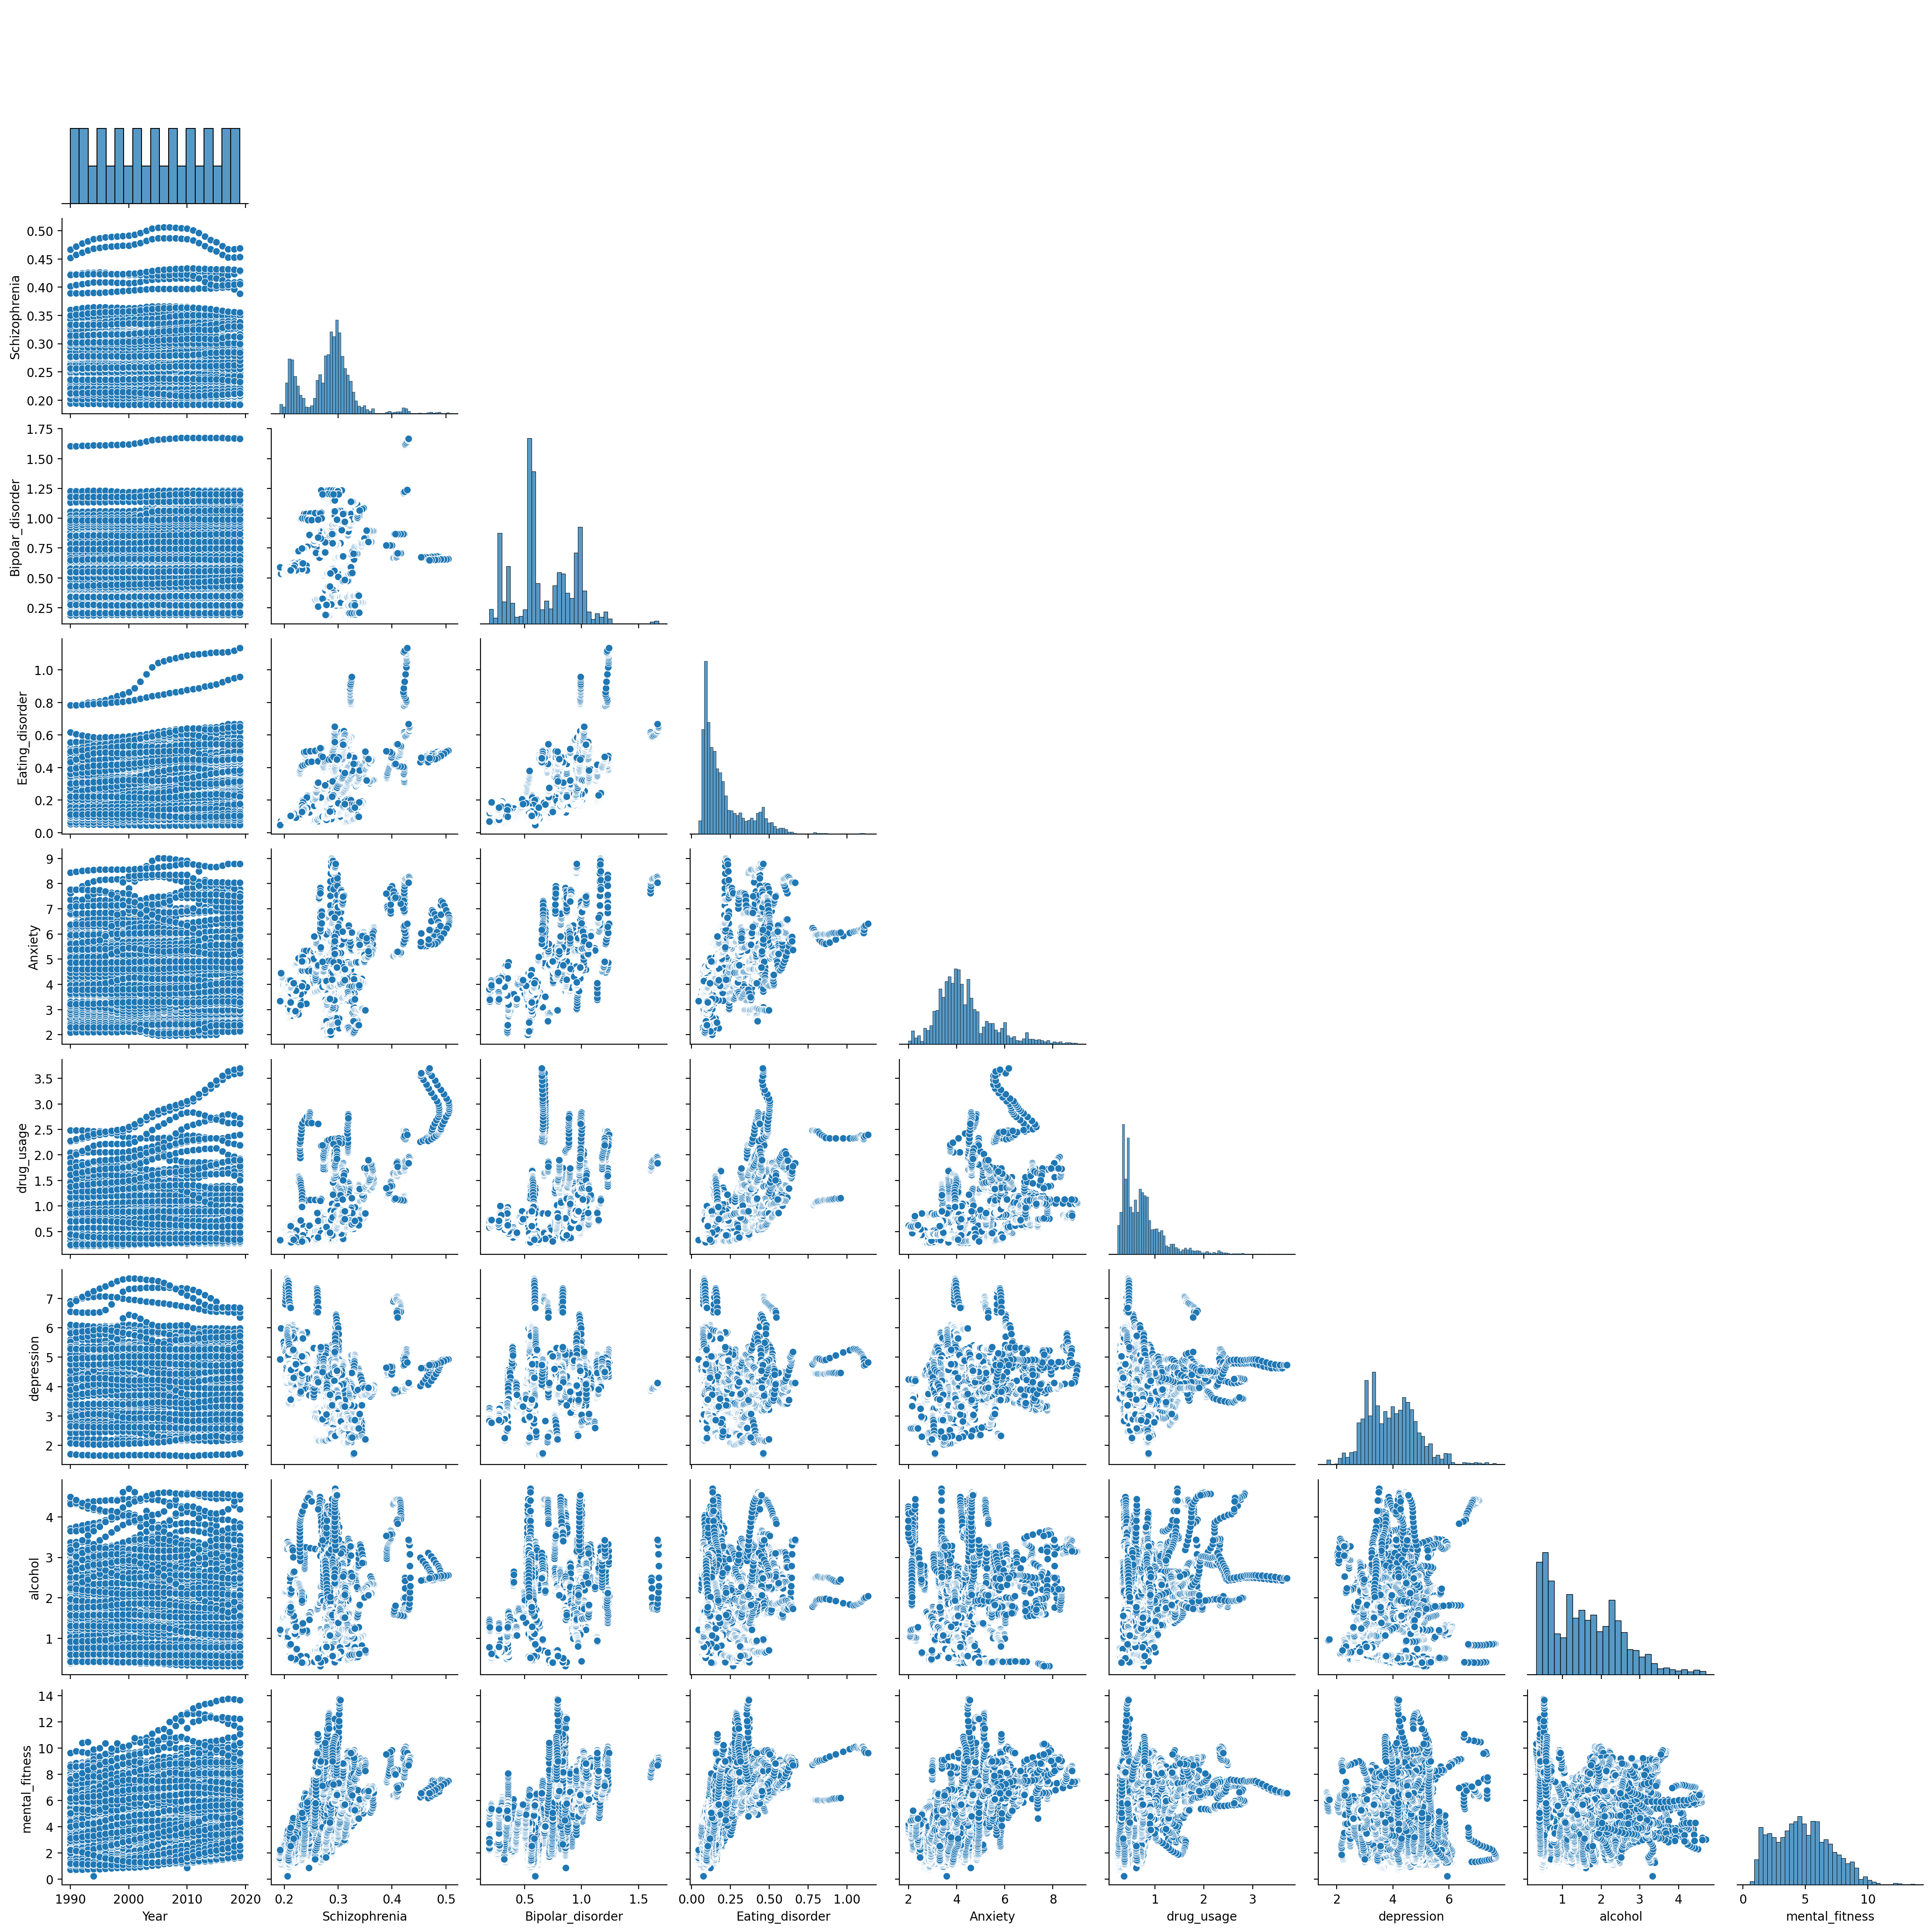

In [82]:
sns.pairplot(data,corner=True)
plt.show()

In [83]:
mean = data['mental_fitness'].mean()
mean

4.8180618117506135

In [84]:
fig = px.pie(data, values='mental_fitness', names='alcohol')
fig.show()

In [85]:
fig=px.bar(data.head(10),x='Year',y='mental_fitness',color='Year',template='ggplot2')
fig.show()

In [86]:
fig = px.line(data, x="Year", y="mental_fitness", color='Country',markers=True,color_discrete_sequence=['red','blue'],template='plotly_dark')
fig.show()

In [87]:
df = data.copy()

In [88]:
df.head()

Country  Year  Schizophrenia  Bipolar_disorder  Eating_disorder  \
0  Afghanistan  1990       0.228979          0.721207         0.131001   
1  Afghanistan  1991       0.228120          0.719952         0.126395   
2  Afghanistan  1992       0.227328          0.718418         0.121832   
3  Afghanistan  1993       0.226468          0.717452         0.117942   
4  Afghanistan  1994       0.225567          0.717012         0.114547   

    Anxiety  drug_usage  depression   alcohol  mental_fitness  
0  4.835127    0.454202    5.125291  0.444036        1.696670  
1  4.821765    0.447112    5.116306  0.444250        1.734281  
2  4.801434    0.441190    5.106558  0.445501        1.791189  
3  4.789363    0.435581    5.100328  0.445958        1.776779  
4  4.784923    0.431822    5.099424  0.445779        1.712986

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6840 entries, 0 to 6839
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           6840 non-null   object 
 1   Year              6840 non-null   int64  
 2   Schizophrenia     6840 non-null   float64
 3   Bipolar_disorder  6840 non-null   float64
 4   Eating_disorder   6840 non-null   float64
 5   Anxiety           6840 non-null   float64
 6   drug_usage        6840 non-null   float64
 7   depression        6840 non-null   float64
 8   alcohol           6840 non-null   float64
 9   mental_fitness    6840 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 587.8+ KB


In [90]:
#Transform non numeric labes to numeric labels
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for i in df.columns:
    if df[i].dtype == 'object':
        df[i]=l.fit_transform(df[i])

In [91]:
df.shape

(6840, 10)

**`Split data**


In [92]:
X = df.drop('mental_fitness',axis=1)
y = df['mental_fitness']

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=2)

In [98]:
print("xtrain: ", xtrain.shape)
print("xtest: ", xtest.shape)
print("\n ytrain: ", ytrain.size)
print("ytest: ", ytest.size)

xtrain:  (5472, 9)
xtest:  (1368, 9)

 ytrain:  5472
ytest:  1368


**LINEAR REGRESSION**

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lr = LinearRegression()
lr.fit(xtrain,ytrain)

# model evaluation for training set
ytrain_pred = lr.predict(xtrain)
mse = mean_squared_error(ytrain, ytrain_pred)
rmse = (np.sqrt(mean_squared_error(ytrain, ytrain_pred)))
r2 = r2_score(ytrain, ytrain_pred)

print("The model performance for training set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
MSE is 1.389959372405798
RMSE is 1.1789653821914357
R2 score is 0.7413245790025275


**RANDOM FOREST REGRESSOR**

In [108]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(xtrain, ytrain)

# model evaluation for training set
ytrain_pred = rf.predict(xtrain)
mse = mean_squared_error(ytrain, ytrain_pred)
rmse = (np.sqrt(mean_squared_error(ytrain, ytrain_pred)))
r2 = r2_score(ytrain, ytrain_pred)

print("The model performance for training set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
MSE is 0.00469446720990193
RMSE is 0.06851618210249262
R2 score is 0.9991263462040776


**EVALUATION**

In [109]:
# model evaluation for testing set
ytest_pred = lr.predict(xtest)
mse = mean_squared_error(ytest, ytest_pred)
rmse = (np.sqrt(mean_squared_error(ytest, ytest_pred)))
r2 = r2_score(ytest, ytest_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
ytest_pred = rf.predict(xtest)
mse = mean_squared_error(ytest, ytest_pred)
rmse = (np.sqrt(mean_squared_error(ytest, ytest_pred)))
r2 = r2_score(ytest, ytest_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MSE is 1.1357545319272384
RMSE is 1.0657178481789813
R2 score is 0.7638974087055272


The model performance for testing set
--------------------------------------
MSE is 0.030430289899235265
RMSE is 0.17444279835876075
R2 score is 0.993674099378798
